# Sprocket Customer Segmentation
Sprocket aims to better understand its customers and tailor its marketing strategies to effectively meet their diverse needs. One approach to achieving this is through customer segmentation. Customer segmentation allows businesses to group customers into distinct segments based on their shared characteristics, behaviors, and preferences. By identifying these segments, Sprocket can gain valuable insights into its customer base, enabling targeted marketing campaigns, personalized offerings, and improved customer experiences. 

In this context, we will employ the K-means clustering algorithm using RFM (Recency,Frequency and Monetary) features to segment Sprocket's customers based on their purchasing patterns, preferences, and interactions with the company. By utilizing this data-driven approach, Sprocket can develop more effective marketing strategies, enhance customer satisfaction, and drive business growth.

## Loading packages and Inspecting the Data
The code below imports the packages necessary for data manipulation, visualization, pre-processing, and clustering. It also sets up the visualization style and loads in the data.

The RFM values have been extracted using Excel.

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set visualization style
sns.set_style("darkgrid")

# Load the data and replace with your CSV file path
sprocket = pd.read_csv("data/sprocket_RFM.csv")

# Preview the data
sprocket

,customer_id,recency,frequency,monetary_value
0,1,8,11,3018.09
1,2,129,3,2226.26
2,5,17,6,2394.94
3,8,23,9,5364.39
4,9,79,6,2353.11
...,...,...,...,...
3057,3493,94,6,3728.88
3058,3494,5,4,2755.11
3059,3495,14,7,3847.65
3060,3496,257,4,2045.84


In [2]:
# Check dataframe info
sprocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     3062 non-null   int64  
 1   recency         3062 non-null   int64  
 2   frequency       3062 non-null   int64  
 3   monetary_value  3062 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 95.8 KB


In [3]:
# Change monetary value data type
sprocket['monetary_value'] = sprocket['monetary_value'].astype(int)

## Data Exploration
Printing descriptive statistics is helpful because K-means clustering has several key assumptions that can be revealed via this exploration:

1. There is no skewness to the data.
2. The variables have the same average values.
3. The variables have the same variance.

In [4]:
# Select columns for clustering
columns_for_clustering = ["recency", "frequency","monetary_value"]

# Create new DataFrame with clustering variables
sprocket_features = sprocket[columns_for_clustering]

# Print a summary of descriptive statistics
sprocket_features.describe()

,recency,frequency,monetary_value
count,3062.000000,3062.000000,3062.000000
mean,64.066297,5.532332,3058.741672
std,59.889961,2.277706,1750.399981
min,1.000000,1.000000,15.000000
25%,19.000000,4.000000,1781.500000
50%,46.000000,5.000000,2794.000000
75%,90.000000,7.000000,4098.000000
max,354.000000,14.000000,11668.000000


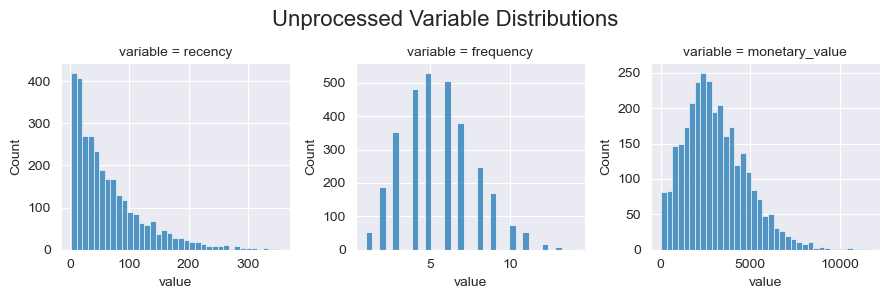

In [5]:
# Plot the distributions of the selected variables
g = sns.FacetGrid(
    sprocket_features.melt(),  # Reformat the DataFrame for plotting purposes
    col="variable",  # Split on the 'variable' column created by reformating
    sharey=False,  # Turn off shared y-axis
    sharex=False,  # Turn off shared x-axis
)
# Apply a histogram to the facet grid
g.map(sns.histplot, "value")
# Adjust the top of the plots to make room for the title
g.fig.subplots_adjust(top=0.8)
# Create a title
g.fig.suptitle("Unprocessed Variable Distributions", fontsize=16)
plt.show()

## Data Processing
As seen above, our data doesn't meet the requirements for segmentation. We would need to perform some transformation on our variables.

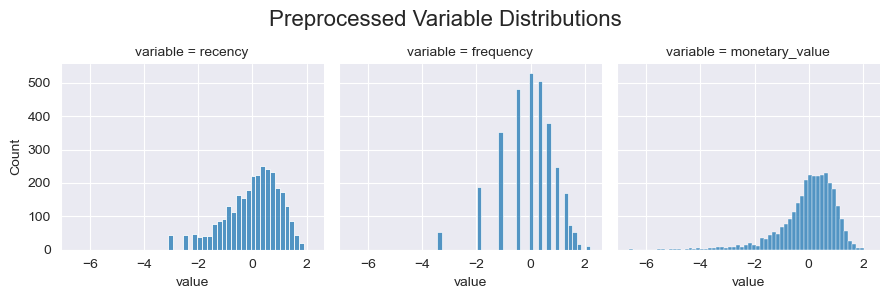

In [6]:
# Perform a log transformation of the data to unskew the data
sprocket_log = np.log(sprocket_features)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(sprocket_log)

# Scale and center the data
sprocket_normalized = scaler.transform(sprocket_log)

# Create a pandas DataFrame of the processed data
sprocket_processed = pd.DataFrame(
    data=sprocket_normalized, index=sprocket_features.index, columns=sprocket_features.columns
)

# Plot the distributions of the selected variables
g = sns.FacetGrid(sprocket_processed.melt(), col="variable")
g.map(sns.histplot, "value")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16)
plt.show()

## Choosing the Number of Clusters
he next step is to fit a variable number of clusters and plot each cluster's sum-of-squared errors (SSE). The SSE reflects the sum of squared distances from every data point to the cluster center. The aim is to reduce the SSE while still maintaining a reasonable number of clusters.

By plotting the SSE for each number of clusters, you can identify at what point there are diminishing returns by adding new clusters. This type of plot is called an elbow plot.

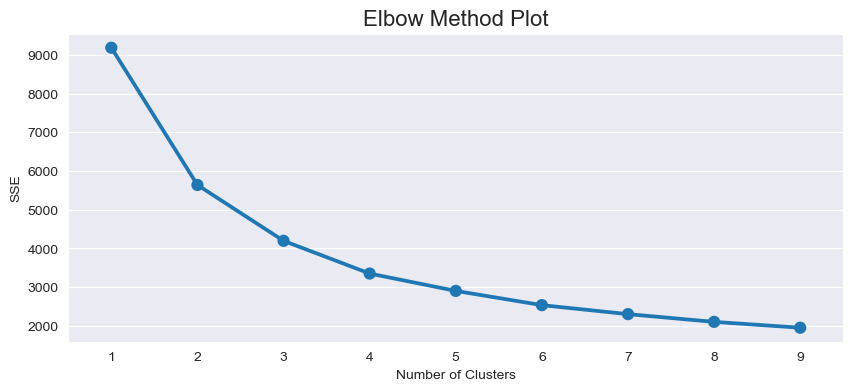

In [7]:
# Set the maximum number of clusters to plot
max_clusters = 10

# Initialize empty dictionary to store sum of squared errors
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, max_clusters):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the normalized dataset
    kmeans.fit(sprocket_processed)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Initialize a figure of set size
plt.figure(figsize=(10, 4))

# Create an elbow plot of SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

# Add labels to the plot
plt.title("Elbow Method Plot", fontsize=16)  # Add a title to the plot
plt.xlabel("Number of Clusters")  # Add x-axis label
plt.ylabel("SSE")  # Add y-axis label

# Show the plot
plt.show()

## Clustering the Data
You can now select an optimal number of clusters based on the elbow plot above by setting k. In this example, k is set to 4.

In [8]:
# Choose number of clusters
k = 4

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(sprocket_processed)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a new DataFrame by adding a new cluster column to the original data
sprocket_clustered = sprocket.assign(Cluster=cluster_labels)

# Preview the clustered DataFrame
sprocket_clustered

,customer_id,recency,frequency,monetary_value,Cluster
0,1,8,11,3018,1
1,2,129,3,2226,0
2,5,17,6,2394,1
3,8,23,9,5364,3
4,9,79,6,2353,3
...,...,...,...,...,...
3057,3493,94,6,3728,3
3058,3494,5,4,2755,1
3059,3495,14,7,3847,1
3060,3496,257,4,2045,0


## Inspecting the Clusters

In [9]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = sprocket_clustered.groupby('Cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
  
  	# Return the size of each segment
    'monetary_value': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

        recency frequency monetary_value      
           mean      mean           mean count
Cluster                                       
0          84.9       4.0         2013.1   994
1           9.3       6.5         3658.5   693
2         131.7       2.2          591.4   276
3          62.8       7.1         4245.9  1099


## Cluster Visualization 
### Snake Plot
It is possible to visualize the differences between the clusters using a snake plot. This can be helpful spot trends or key differences that would not be visible with the raw data. 

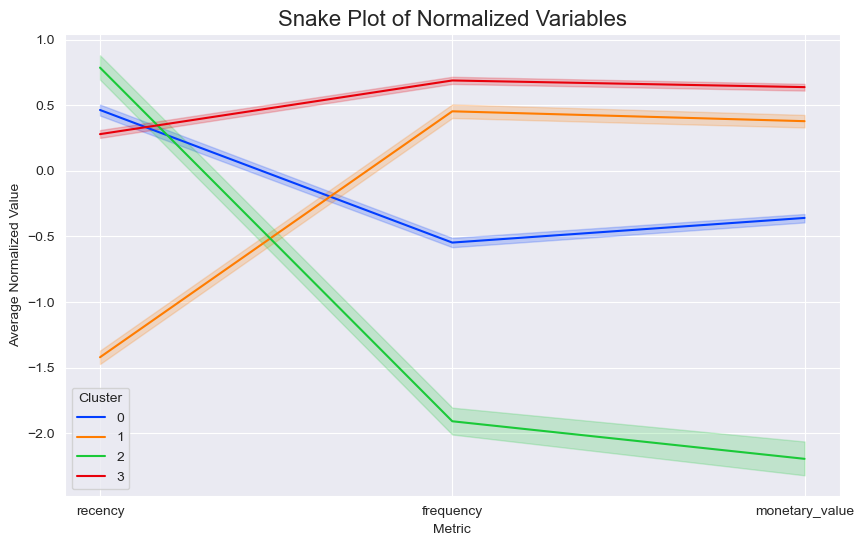

In [10]:
# Assign cluster labels to processed DataFrame
sprocket_processed_clustered = sprocket_processed.assign(Cluster=cluster_labels)

# Melt the normalized DataFrame and reset the index
sprocket_processed_melt = pd.melt(
    sprocket_processed_clustered.reset_index(),
    # Assign the cluster labelss as the ID
    id_vars=['Cluster'],
    # Assign clustering variables as values
    value_vars=sprocket_features.columns,
    # Name the variable and value
    var_name="Metric",
    value_name="Value",
)

# Change the figure size
plt.figure(figsize=(10, 6))

# Add label and titles to the plot
plt.title('Snake Plot of Normalized Variables', fontsize=16)
plt.xlabel('Metric')
plt.ylabel('Average Normalized Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=sprocket_processed_melt, x='Metric', y='Value', hue='Cluster',palette="bright")
plt.show()

### Scatter Plot
It is also possible to visualize our clusters on a scatter plot of the RFM features used for the analysis. 

Text(0.5, 1.0, 'Clustering: Recency Vs Monetary Value')

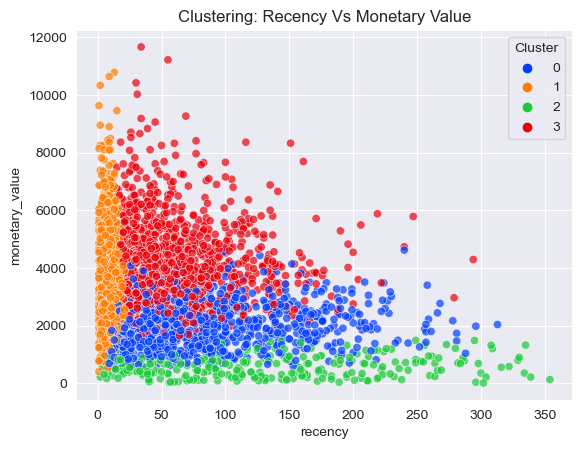

In [11]:
sns.scatterplot(x='recency',y='monetary_value',data=sprocket_clustered,hue='Cluster',alpha=0.7,palette='bright')
plt.title('Clustering: Recency Vs Monetary Value')

You can assume an inverse relationship between recency and monetary value ie customers who visit more recently such as cluster 1 and 3 are the most likely to generate the most profit for the store. 

Text(0.5, 1.0, 'Clustering: Recency Vs Frequency')

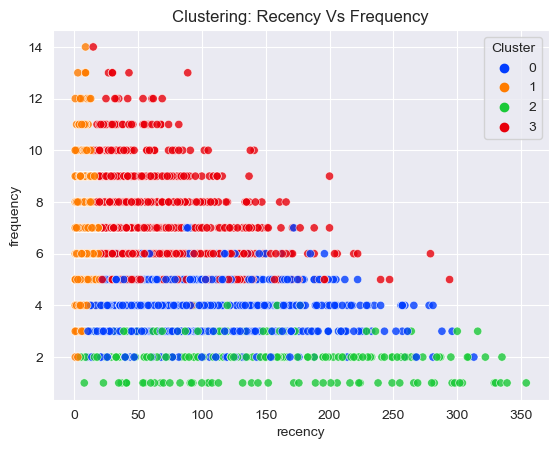

In [12]:
sns.scatterplot(x='recency',y='frequency',data=sprocket_clustered,hue='Cluster',alpha=0.8,palette='bright')
plt.title('Clustering: Recency Vs Frequency')

You can assume an inverse relationship between recency and frequency ie customers who visit more recently such as cluster 1 and 3 are the most likely to purchase more items from the store. 

Text(0.5, 1.0, 'Clustering: Frequency Vs Monetary Value')

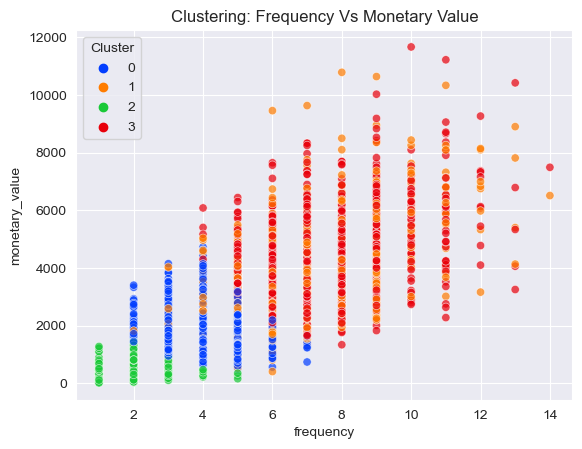

In [13]:
sns.scatterplot(x='frequency',y='monetary_value',data=sprocket_clustered,hue='Cluster',alpha=0.7,palette='bright')
plt.title('Clustering: Frequency Vs Monetary Value')

You can assume an positive relationship between frequency and monetary value ie customers who visit more frequently such as cluster 1 and 3 are the most likely to generate the most profit for the store. 

## Labeling Clusters
Based on the analysis of the clusters, some customer titles have been given.

|Cluster|Label|Description|
|:----|:----|:----|
|0|Need Attention|These customers have the second-poorest recency score (84.9), indicating that their last purchase was long ago. They also have a relatively low purchase frequency score (4.0) and relatively low monetary value (2013.1). They are considered low-spenders with a low number of orders.|
|1|Champion |These customers have the best recency score (9.3), indicating recent purchases. They also have a high purchase frequency score (6.5) and a high monetary value (3658.5). They are frequent buyers who spend a significant amount on your products.|
|2|Lost|These customers have the poorest scores across all three metrics (recency, frequency, and monetary value). They are characterized by poor recency (131.7), low frequency (2.2), and low monetary value (591.4). They represent customers who were once active but have become disengaged.|
|3|Loyal |These customers have a moderate recency score (62.8) but a high frequency (7.1) and high monetary value (4245.9). They are often spending good money on your products and are responsive to promotions.|

We shall then apply these labels to our data

In [14]:
# Create function
def cluster_label(x):
    if x == 0:
        return "Need Attention"
    elif x == 1:
        return "Champion"
    elif x == 2:
        return "Lost"
    else:
        return "Loyal"
    
sprocket_clustered['customer_title'] = sprocket_clustered['Cluster'].apply(cluster_label)
sprocket_clustered

,customer_id,recency,frequency,monetary_value,Cluster,customer_title
0,1,8,11,3018,1,Champion
1,2,129,3,2226,0,Need Attention
2,5,17,6,2394,1,Champion
3,8,23,9,5364,3,Loyal
4,9,79,6,2353,3,Loyal
...,...,...,...,...,...,...
3057,3493,94,6,3728,3,Loyal
3058,3494,5,4,2755,1,Champion
3059,3495,14,7,3847,1,Champion
3060,3496,257,4,2045,0,Need Attention


## Export Data 
Export the data for further analysis using Excel and PowerBI.

In [15]:
# Export CSV
sprocket_clustered.to_csv('Data/Sprocket_clustered.csv', index=False)